In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Train_v2.csv")
test = pd.read_csv("Test_v2.csv")
train.head()

country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Widowed   
2         Other relative     Single/Never Married   
3      Head of Household  Married/Living together   
4                  Child     Single/Never Married   

                   education_level                   job_type  
0              Secondary education              Self employed  
1              No formal education       Government Dependent  
2  Vocational/Specialised training              Self employed  
3                Primary education  Formally employed Private  
4                Primary education        Informally employed

In [3]:
test.head()

country  year       uniqueid location_type cellphone_access  household_size  \
0   Kenya  2018  uniqueid_6056         Urban              Yes               3   
1   Kenya  2018  uniqueid_6060         Urban              Yes               7   
2   Kenya  2018  uniqueid_6065         Rural               No               3   
3   Kenya  2018  uniqueid_6072         Rural               No               6   
4   Kenya  2018  uniqueid_6073         Urban               No               3   

   age_of_respondent gender_of_respondent relationship_with_head  \
0                 30                 Male      Head of Household   
1                 51                 Male      Head of Household   
2                 77               Female                 Parent   
3                 39               Female      Head of Household   
4                 16                 Male                  Child   

            marital_status                  education_level  \
0  Married/Living together              Secondary education   
1  Married/Living together  Vocational/Specialised training   
2  Married/Living together              No formal education   
3  Married/Living together                Primary education   
4     Single/Never Married              Secondary education   

                       job_type  
0  Formally employed Government  
1     Formally employed Private  
2          Remittance Dependent  
3          Remittance Dependent  
4          Remittance Dependent

# Explolatory Data Analysis
*This is the process of finding some insights from you dataset before create predictive models.*

Note: This is important steps in your Data science workflow.

## Let see the statistical overview of our dataset

In [4]:
# describe will show statistical info
train.describe()

year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.797483          38.805220
std        0.847371        2.227613          16.520569
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.000000       21.000000         100.000000

From the above cell we can see that most of our features are categorical because ony 3 columns are numerical that's why it shows only those 3 with the mean, count, standard deviation also the minimum value of each columns the maximum value of each columns along with the interquartile range

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


From this info method we got to know more about our data it first show us the number of non null count als the datatype of each columns along with the total number of each datatypes we have. It shows here that we have 3 features with *int* dataypte and 10 *objects* datatype also it tell us about the size of the file we have which is in our case 2.3MB

In [6]:
# to show the shape of the data
train.shape

(23524, 13)

### Target Distribution

<AxesSubplot:xlabel='bank_account', ylabel='count'>

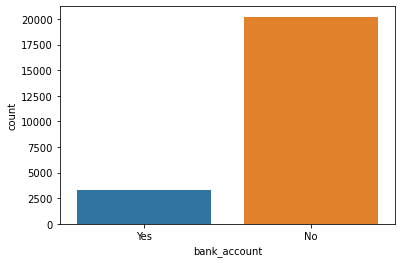

In [7]:
sns.countplot(train.bank_account)

From the above cell we can see that we have unbalanced data basically the number of No is much higher than the number of yes which can lead to poor model performence sometimes. In this can we've about 2500 yes and 20000 No which gives us a big difference later on we will what we can do for this .

### Let's see the percentage of missing data

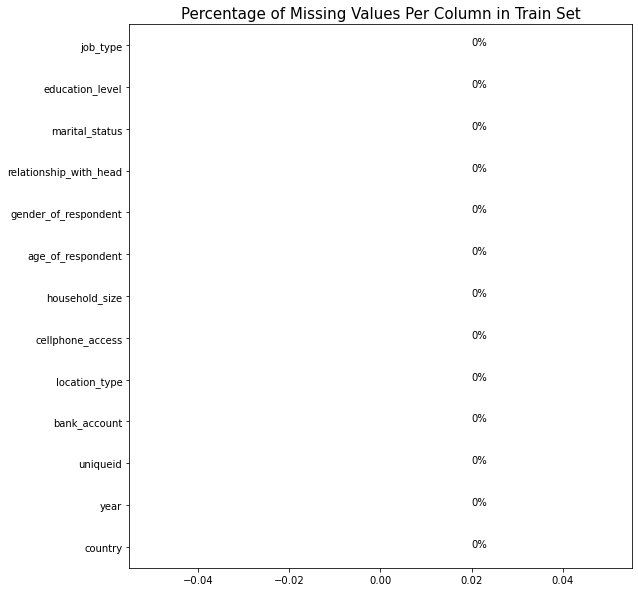

In [8]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

It shows that we don't have any missing values which is good

### Let's see the disctribution of the people with cellphone based on gender.

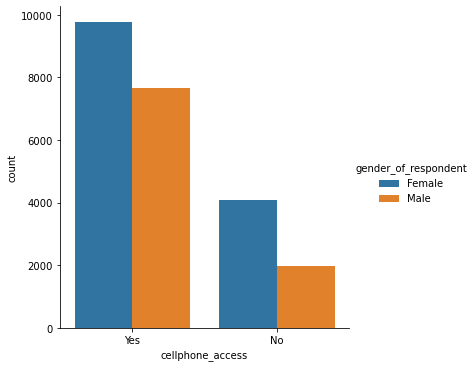

In [9]:
sns.catplot(x='cellphone_access', data=train, kind='count', hue='gender_of_respondent')
plt.show()

This shows that number of male having cellphones is higher than the numbero female in this case.

## Let's see the distribution of age

<AxesSubplot:xlabel='age_of_respondent', ylabel='Density'>

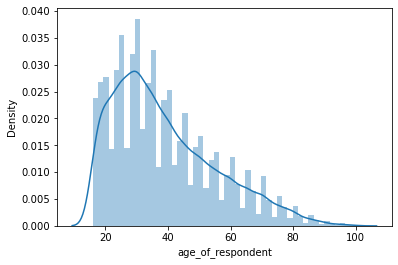

In [10]:
sns.distplot(train.age_of_respondent)

This distribution make sense because we have age range from 16 years old to 100 year

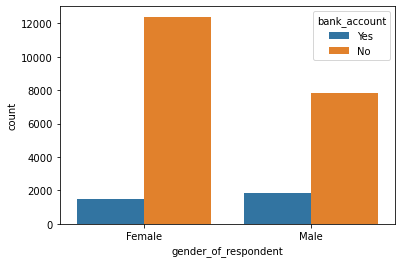

In [11]:
# Distribution of the gender
sns.countplot(train.gender_of_respondent, hue='bank_account', data=train)
plt.show()

we can see that the number of female that have bank account is higher than the number of male with a bank account. 

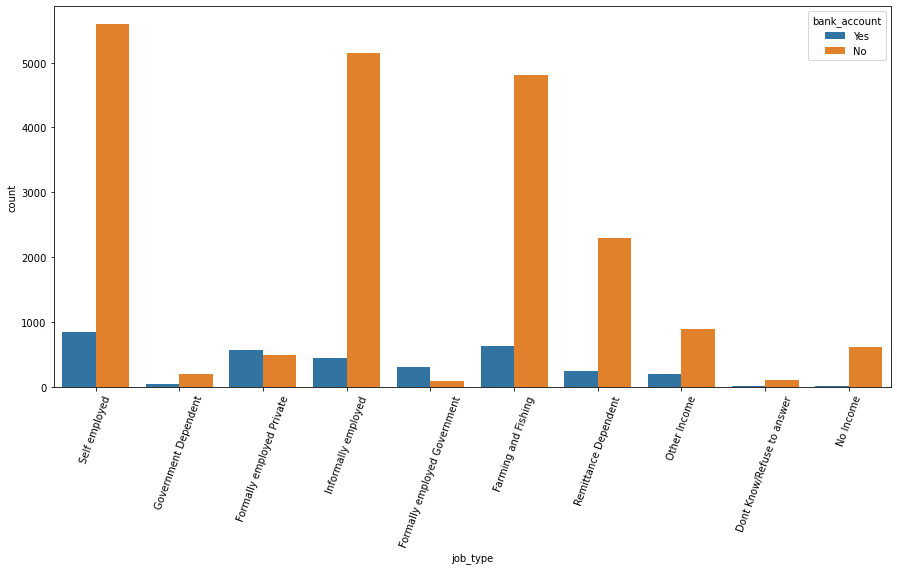

In [12]:
# distribution of job type
plt.figure(figsize=(15,7))
sns.countplot(train.job_type, orient="h",hue='bank_account', data=train)
labels = ['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income']
ax = plt.gca()
ax.set_xticklabels(labels=labels, rotation=70);


we can see from the above graph the the people who are self employed and farming and fishing are those who are more likely to have bank account as compare to the those who work for the Government or other income. 
We can notice also those who don't have no Income and does who reuse to answer don't have high chance of having bank account.

<AxesSubplot:xlabel='location_type', ylabel='count'>

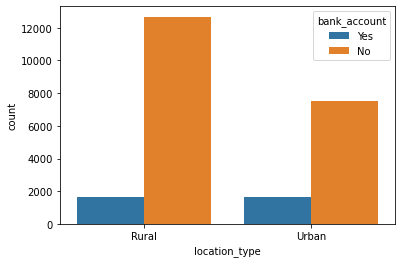

In [13]:
# Distribution of the location based on account
sns.countplot(train.location_type, hue='bank_account', data=train)

We can see that people in Urban area is have more chance to have bank_account than those who are in Rural area although we can see also the number people in Rural area is higher.

<AxesSubplot:xlabel='household_size', ylabel='count'>

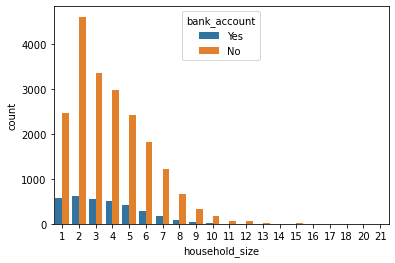

In [14]:
# Distirbution of the household_size
sns.countplot(train.household_size, hue='bank_account', data=train)

## How many people have cellphone

In [15]:
train.cellphone_access.value_counts()[0]

17454

we can see that the number of people who have cellphone access is 17454 which is more than the half which make more sense in this case

### How many types of education do the dataset has?

In [16]:
train.education_level.unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

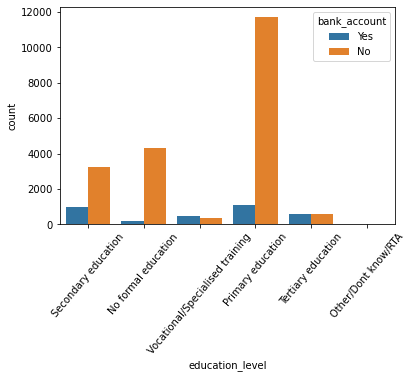

In [17]:
sns.countplot(train.education_level, hue='bank_account', data=train)
labels = ['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA']
ax = plt.gca()
ax.set_xticklabels(labels=labels, rotation=50);

we can see that the vocational/ specialised training is the majority in this case and we have few people with No formal education

In [18]:
train.marital_status.value_counts()


Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

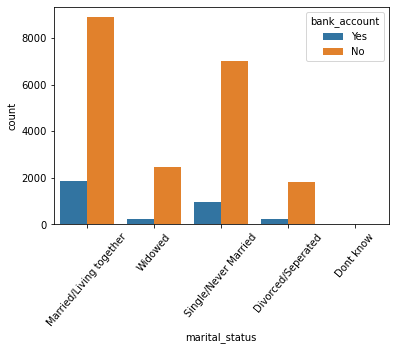

In [19]:
sns.countplot(train.marital_status, hue='bank_account', data=train)
labels = ['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know']
ax=plt.gca()
ax.set_xticklabels(labels = labels, rotation=50);

This shows that people who are married and living together are more likely to have a bank account as compare to ther slike single or divorced

In [20]:
#import preprocessing module 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 

# Convert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

X_train.head()

country  year    uniqueid location_type cellphone_access  household_size  \
0   Kenya  2018  uniqueid_1         Rural              Yes               3   
1   Kenya  2018  uniqueid_2         Rural               No               5   
2   Kenya  2018  uniqueid_3         Urban              Yes               5   
3   Kenya  2018  uniqueid_4         Rural              Yes               5   
4   Kenya  2018  uniqueid_5         Urban               No               8   

   age_of_respondent gender_of_respondent relationship_with_head  \
0                 24               Female                 Spouse   
1                 70               Female      Head of Household   
2                 26                 Male         Other relative   
3                 34               Female      Head of Household   
4                 26                 Male                  Child   

            marital_status                  education_level  \
0  Married/Living together              Secondary education   
1                  Widowed              No formal education   
2     Single/Never Married  Vocational/Specialised training   
3  Married/Living together                Primary education   
4     Single/Never Married                Primary education   

                    job_type  
0              Self employed  
1       Government Dependent  
2              Self employed  
3  Formally employed Private  
4        Informally employed

In [21]:
# function to preprocess our data from train models

def preprocessing_data(data):

    # Convert the following numerical labels from integer to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(
        float
    )

    # categorical features to be converted by One Hot Encoding
    categ = [
        "relationship_with_head",
        "marital_status",
        "education_level",
        "job_type",
        "country",
    ]

    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)

    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])

    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)

    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)

    return data

In [22]:
processed_train_data = preprocessing_data(X_train)


In [23]:
#target
y_train.head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int64

In [24]:
train

country  year       uniqueid  bank_account location_type  \
0       Kenya  2018     uniqueid_1             1         Rural   
1       Kenya  2018     uniqueid_2             0         Rural   
2       Kenya  2018     uniqueid_3             1         Urban   
3       Kenya  2018     uniqueid_4             0         Rural   
4       Kenya  2018     uniqueid_5             0         Urban   
...       ...   ...            ...           ...           ...   
23519  Uganda  2018  uniqueid_2113             0         Rural   
23520  Uganda  2018  uniqueid_2114             0         Rural   
23521  Uganda  2018  uniqueid_2115             0         Rural   
23522  Uganda  2018  uniqueid_2116             0         Urban   
23523  Uganda  2018  uniqueid_2117             0         Rural   

      cellphone_access  household_size  age_of_respondent  \
0                  Yes               3                 24   
1                   No               5                 70   
2                  Yes               5                 26   
3                  Yes               5                 34   
4                   No               8                 26   
...                ...             ...                ...   
23519              Yes               4                 48   
23520              Yes               2                 27   
23521              Yes               5                 27   
23522              Yes               7                 30   
23523              Yes              10                 20   

      gender_of_respondent relationship_with_head           marital_status  \
0                   Female                 Spouse  Married/Living together   
1                   Female      Head of Household                  Widowed   
2                     Male         Other relative     Single/Never Married   
3                   Female      Head of Household  Married/Living together   
4                     Male                  Child     Single/Never Married   
...                    ...                    ...                      ...   
23519               Female      Head of Household       Divorced/Seperated   
23520               Female      Head of Household     Single/Never Married   
23521               Female                 Parent                  Widowed   
23522               Female                 Parent       Divorced/Seperated   
23523                 Male                  Child     Single/Never Married   

                       education_level                   job_type  
0                  Secondary education              Self employed  
1                  No formal education       Government Dependent  
2      Vocational/Specialised training              Self employed  
3                    Primary education  Formally employed Private  
4                    Primary education        Informally employed  
...                                ...                        ...  
23519              No formal education               Other Income  
23520              Secondary education               Other Income  
23521                Primary education               Other Income  
23522              Secondary education              Self employed  
23523              Secondary education                  No Income  

[23524 rows x 13 columns]